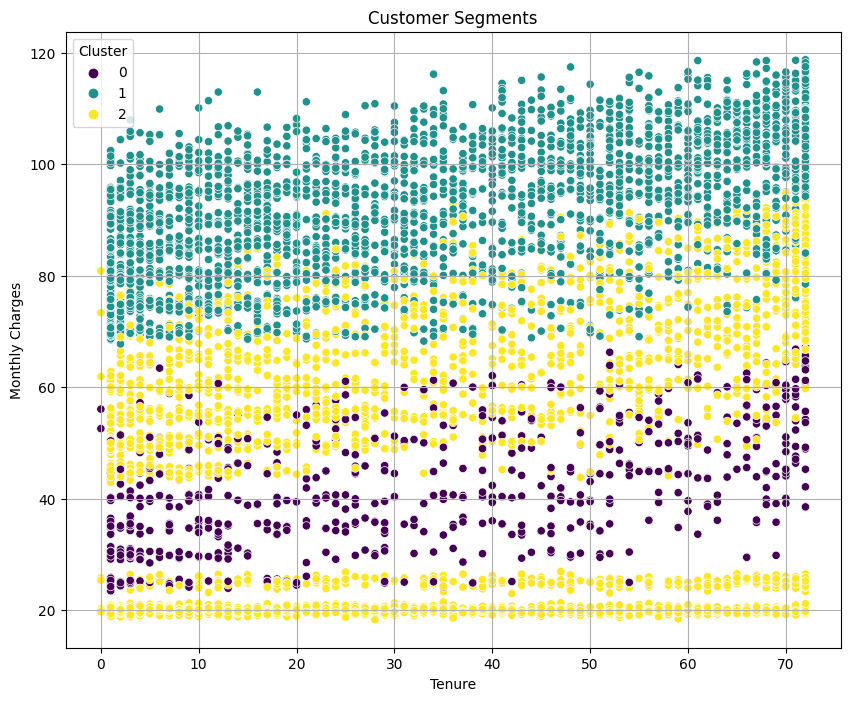

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Load the dataset
url = 'https://drive.google.com/uc?id=1qBkAiPPQ9bTiaY6PcDq7Tmp8DQsCyyrZ'
df = pd.read_csv(url)

# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df)
target_column = 'Churn_No'

# Separate features and target variable
X = df_encoded.drop([target_column, 'Churn_Yes'], axis=1)  # Drop the target variables

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Load the trained model
kmeans = joblib.load('kmeans_model.pkl')

# Predict clusters
clusters = kmeans.predict(X_scaled)

# Add the cluster labels to the dataset
df_encoded['Cluster'] = clusters

# Create visualizations of the clusters using 'Tenure' and 'Monthly Charges'
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_encoded['tenure'], y=df_encoded['MonthlyCharges'], hue=clusters, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.legend(title='Cluster')

# Save the clustering visualization plot
plt.savefig('clustering_visualization.png')
plt.show()


In [9]:
from fpdf import FPDF

# Define the cluster insights text
cluster_insights_text = """
# Cluster Insights Documentation

## Introduction

In this report, we present the insights derived from clustering analysis of the customer data. The objective of this analysis is to segment customers into distinct groups based on their tenure and monthly charges. This segmentation can help in understanding customer behavior and tailoring marketing strategies accordingly.

## Methodology

The customer dataset was preprocessed by converting categorical variables to numerical values using one-hot encoding. Standardization was applied to scale the features. The K-Means clustering algorithm was used to segment the customers. The optimal number of clusters was determined using the Elbow Method, and a 3-cluster model was chosen for this analysis.

## Clustering Insights

### Cluster Description

1. **Cluster 0**: This cluster represents customers with relatively low tenure and lower monthly charges. These customers might be new to the service and have chosen basic plans.
2. **Cluster 1**: Customers in this cluster have a moderate tenure and higher monthly charges. They are likely to be regular users who have opted for more premium plans.
3. **Cluster 2**: This cluster includes customers with high tenure and varying monthly charges. These customers are long-term users, some of whom might have switched between plans.

### Visual Representation

In the scatter plot:
- **Cluster 0** is represented by purple dots.
- **Cluster 1** is represented by yellow dots.
- **Cluster 2** is represented by teal dots.

## Conclusion

The clustering analysis reveals distinct customer segments that can be targeted for personalized marketing strategies. By understanding the characteristics of each cluster, the company can develop tailored offerings to improve customer retention and satisfaction.
"""

# Create a PDF to save the cluster insights documentation
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Cluster Insights Documentation", ln=True, align='C')
pdf.ln(10)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, cluster_insights_text)

# Save the PDF
pdf_output_path = "cluster_insights_documentation.pdf"
pdf.output(pdf_output_path)

print(f"Cluster insights documentation saved as {pdf_output_path}")


Cluster insights documentation saved as cluster_insights_documentation.pdf
